In [10]:
%pylab inline
import seaborn as sns
import nltk
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

Populating the interactive namespace from numpy and matplotlib


/usr/local/lib/python2.7/site-packages/IPython/core/magics/pylab.py:161: UserWarning: pylab import has clobbered these variables: ['plot']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [3]:
txtFile = '5_4_3_all_data.csv'
df = pd.read_csv(txtFile, header = 0)
df.head()

review  sentiment
0  no problem with constant improvement i switche...          1
1  i live  minutes away from the nearest branch a...          1
2  i am very annoyed with this app i do like bein...          0
3  i dont see how so many people on the reviews c...          1
4  you can do almost every function the full site...          1

In [4]:
df['len'] = [len(x) for x in df['review']]

In [6]:
pos = df[(df['sentiment'] == 1)]
plot = sns.distplot(pos['len'], label = 'Distribution of Positive Scores', axlabel = 'Length of the Reviews', color = "g")
fig = plot.get_figure()
fig.savefig("pos_distribution.png")
print('Mean = :', np.mean(pos['len']))
print('std = :', np.std(pos['len']))

('Mean = :', 108.14862591651277)
('std = :', 114.56359160662112)


In [7]:
neg = df[(df['sentiment'] == 0)]
plot = sns.distplot(neg['len'],label='Distribution of Positive Scores',axlabel='Length of the Reviews', color="r")
fig = plot.get_figure()
fig.savefig("neg_distribution.png")
print 'mean =', np.mean(neg['len'])
print 'std =', np.std(neg['len'])

mean = 118.569851108
std = 149.520259822


In [8]:
df.describe()

sentiment            len
count  123419.000000  123419.000000
mean        0.886265     109.333879
std         0.317490     119.104230
min         0.000000       1.000000
25%         1.000000      35.000000
50%         1.000000      75.000000
75%         1.000000     143.000000
max         1.000000    5285.000000

In [11]:
# Mapping length of sentences
def len_vis(data_col):
    t_col = data_col.apply(lambda x: len(x))
    fig=plt.figure() #Plots in matplotlib reside within a figure object, use plt.figure to create new figure
    #Create one or more subplots using add_subplot, because you can't create blank figure
    ax = fig.add_subplot(1,1,1)
    #Variable
    ax.hist(t_col,bins = 50) # Here you can play with number of bins

    plt.title('Length Distribution')
    plt.xlabel('Length')
    plt.ylabel('Frequency')
    plt.show()

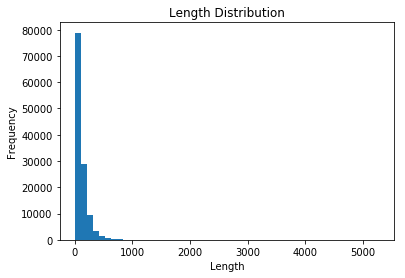

In [13]:
len_vis(df['review'])

In [19]:
def count_unique(words):
    uniq = set()
    for sentence in words:
        for word in sentence:
            uniq.add(word)
    return len(uniq)

In [15]:
df['review'] = df['review'].apply(lambda x: unicode(x, errors = "ignore"))

In [16]:
from nltk.tokenize import RegexpTokenizer

tokenizer = RegexpTokenizer(r'\w+')

df['review'] = df['review'].apply(lambda x: tokenizer.tokenize(x))
df.head()

review  sentiment   len
0  [no, problem, with, constant, improvement, i, ...          1  1316
1  [i, live, minutes, away, from, the, nearest, b...          1  1276
2  [i, am, very, annoyed, with, this, app, i, do,...          0  1373
3  [i, dont, see, how, so, many, people, on, the,...          1  1203
4  [you, can, do, almost, every, function, the, f...          1  1212

In [20]:
count_unique(df['review'])

26861

In [22]:
# POS tag
df['posr']= df['review'].apply(lambda x: nltk.pos_tag(x))
# Leave the non POS removal ones alone
df['nposr'] = df['review']

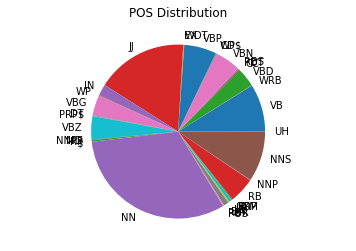

In [23]:
# Visualize Parts of Speech
pos_dict = {}
for sent in df['posr']:
    for pair in sent:
        if pair[1] in pos_dict:
            pos_dict[pair[1]].add(pair[0])
        else:
            pos_dict.update({pair[1]: set(pair[0])})

# Pie chart of POS distribution
temp = pos_dict.values()
x_list = []
for x in temp: 
    x_list.append(len(x))
label_list = pos_dict.keys()
pyplot.axis("equal") #The pie chart is oval by default. To make it a circle use pyplot.axis("equal")
#To show the percentage of each pie slice, pass an output format to the autopctparameter 
plt.pie(x_list,labels=label_list) 
plt.title("POS Distribution")
plt.show()

In [24]:
df.head()

review  sentiment   len  \
0  [no, problem, with, constant, improvement, i, ...          1  1316   
1  [i, live, minutes, away, from, the, nearest, b...          1  1276   
2  [i, am, very, annoyed, with, this, app, i, do,...          0  1373   
3  [i, dont, see, how, so, many, people, on, the,...          1  1203   
4  [you, can, do, almost, every, function, the, f...          1  1212   

                                                posr  \
0  [(no, DT), (problem, NN), (with, IN), (constan...   
1  [(i, JJ), (live, VBP), (minutes, NNS), (away, ...   
2  [(i, NN), (am, VBP), (very, RB), (annoyed, JJ)...   
3  [(i, JJ), (dont, NN), (see, VBP), (how, WRB), ...   
4  [(you, PRP), (can, MD), (do, VB), (almost, RB)...   

                                               nposr  
0  [no, problem, with, constant, improvement, i, ...  
1  [i, live, minutes, away, from, the, nearest, b...  
2  [i, am, very, annoyed, with, this, app, i, do,...  
3  [i, dont, see, how, so, many, people, on, the,...  
4  [you, can, do, almost, every, function, the, f...

In [25]:
pos_keep = ["JJ","JJR","JJS","NN","NNP","NNS","RB","RBR","VB","VBD","VBG","VBN","VBZ"]


def remove_pos(full):
    redc =[]
    for pair in full:
        if pair[1] in pos_keep:
            redc.append(pair[0])
    return redc
# Remove the words that are not in pos_keep
df['posr']= df['posr'].apply(lambda x: remove_pos(x))

df.head()

review  sentiment   len  \
0  [no, problem, with, constant, improvement, i, ...          1  1316   
1  [i, live, minutes, away, from, the, nearest, b...          1  1276   
2  [i, am, very, annoyed, with, this, app, i, do,...          0  1373   
3  [i, dont, see, how, so, many, people, on, the,...          1  1203   
4  [you, can, do, almost, every, function, the, f...          1  1212   

                                                posr  \
0  [problem, constant, improvement, i, switched, ...   
1  [i, minutes, away, nearest, branch, app, lets,...   
2  [i, very, annoyed, app, i, being, able, check,...   
3  [i, dont, so, many, people, reviews, not, show...   
4  [do, almost, function, full, site, allows, do,...   

                                               nposr  
0  [no, problem, with, constant, improvement, i, ...  
1  [i, live, minutes, away, from, the, nearest, b...  
2  [i, am, very, annoyed, with, this, app, i, do,...  
3  [i, dont, see, how, so, many, people, on, the,...  
4  [you, can, do, almost, every, function, the, f...

In [26]:
print(count_unique(df['posr']))

25703


In [27]:
# Import the list of stopwords from NLTK
from nltk.corpus import stopwords

# Remove the stopwords and store in "No Stops" column
stop = set(stopwords.words('english'))
# Ensure "not" is kept
stop.remove("not")
df['posr_stpd'] = df['posr'].apply(lambda x: [item for item in x if item not in stop])
df['nposr_stpd'] = df['nposr'].apply(lambda x: [item for item in x if item not in stop])
df['posr_nstpd'] = df['posr']
df['nposr_nstpd'] = df['nposr']
# visual check
df.head()

review  sentiment   len  \
0  [no, problem, with, constant, improvement, i, ...          1  1316   
1  [i, live, minutes, away, from, the, nearest, b...          1  1276   
2  [i, am, very, annoyed, with, this, app, i, do,...          0  1373   
3  [i, dont, see, how, so, many, people, on, the,...          1  1203   
4  [you, can, do, almost, every, function, the, f...          1  1212   

                                                posr  \
0  [problem, constant, improvement, i, switched, ...   
1  [i, minutes, away, nearest, branch, app, lets,...   
2  [i, very, annoyed, app, i, being, able, check,...   
3  [i, dont, so, many, people, reviews, not, show...   
4  [do, almost, function, full, site, allows, do,...   

                                               nposr  \
0  [no, problem, with, constant, improvement, i, ...   
1  [i, live, minutes, away, from, the, nearest, b...   
2  [i, am, very, annoyed, with, this, app, i, do,...   
3  [i, dont, see, how, so, many, people, on, the,...   
4  [you, can, do, almost, every, function, the, f...   

                                           posr_stpd  \
0  [problem, constant, improvement, switched, cha...   
1  [minutes, away, nearest, branch, app, lets, ba...   
2  [annoyed, app, able, check, balance, recent, c...   
3  [dont, many, people, reviews, not, showing, cu...   
4  [almost, function, full, site, allows, directl...   

                                          nposr_stpd  \
0  [problem, constant, improvement, switched, cha...   
1  [live, minutes, away, nearest, branch, app, le...   
2  [annoyed, app, like, able, check, balance, rec...   
3  [dont, see, many, people, reviews, complain, n...   
4  [almost, every, function, full, site, allows, ...   

                                          posr_nstpd  \
0  [problem, constant, improvement, i, switched, ...   
1  [i, minutes, away, nearest, branch, app, lets,...   
2  [i, very, annoyed, app, i, being, able, check,...   
3  [i, dont, so, many, people, reviews, not, show...   
4  [do, almost, function, full, site, allows, do,...   

                                         nposr_nstpd  
0  [no, problem, with, constant, improvement, i, ...  
1  [i, live, minutes, away, from, the, nearest, b...  
2  [i, am, very, annoyed, with, this, app, i, do,...  
3  [i, dont, see, how, so, many, people, on, the,...  
4  [you, can, do, almost, every, function, the, f...

In [28]:
#testing 3 different stemmers: porter, snowball, and lancaster
ps = nltk.PorterStemmer()
ss = nltk.SnowballStemmer('english')
ls = nltk.LancasterStemmer()

# No Stemming
df['nposr_nstpd_nstem'] = df['nposr_nstpd']
df['posr_nstpd_nstem'] = df['posr_nstpd']
df['nposr_stpd_nstem'] = df['nposr_stpd']
df['posr_stpd_nstem'] = df['posr_stpd']
# Porter
df['nposr_nstpd_port'] = df['nposr_nstpd'].apply(lambda x: [ps.stem(y) for y in x])
df['posr_nstpd_port'] = df['posr_nstpd'].apply(lambda x: [ps.stem(y) for y in x])
df['nposr_stpd_port'] = df['nposr_stpd'].apply(lambda x: [ps.stem(y) for y in x])
df['posr_stpd_port'] = df['posr_stpd'].apply(lambda x: [ps.stem(y) for y in x])
# Snowball
df['nposr_nstpd_snow'] = df['nposr_nstpd'].apply(lambda x: [ss.stem(y) for y in x])
df['posr_nstpd_snow'] = df['posr_nstpd'].apply(lambda x: [ss.stem(y) for y in x])
df['nposr_stpd_snow'] = df['nposr_stpd'].apply(lambda x: [ss.stem(y) for y in x])
df['posr_stpd_snow'] = df['posr_stpd'].apply(lambda x: [ss.stem(y) for y in x])
# Lancaster
df['nposr_nstpd_lanc'] = df['nposr_nstpd'].apply(lambda x: [ls.stem(y) for y in x])
df['posr_nstpd_lanc'] = df['posr_nstpd'].apply(lambda x: [ls.stem(y) for y in x])
df['nposr_stpd_lanc'] = df['nposr_stpd'].apply(lambda x: [ls.stem(y) for y in x])
df['posr_stpd_lanc'] = df['posr_stpd'].apply(lambda x: [ls.stem(y) for y in x])

df.head()

review  sentiment   len  \
0  [no, problem, with, constant, improvement, i, ...          1  1316   
1  [i, live, minutes, away, from, the, nearest, b...          1  1276   
2  [i, am, very, annoyed, with, this, app, i, do,...          0  1373   
3  [i, dont, see, how, so, many, people, on, the,...          1  1203   
4  [you, can, do, almost, every, function, the, f...          1  1212   

                                                posr  \
0  [problem, constant, improvement, i, switched, ...   
1  [i, minutes, away, nearest, branch, app, lets,...   
2  [i, very, annoyed, app, i, being, able, check,...   
3  [i, dont, so, many, people, reviews, not, show...   
4  [do, almost, function, full, site, allows, do,...   

                                               nposr  \
0  [no, problem, with, constant, improvement, i, ...   
1  [i, live, minutes, away, from, the, nearest, b...   
2  [i, am, very, annoyed, with, this, app, i, do,...   
3  [i, dont, see, how, so, many, people, on, the,...   
4  [you, can, do, almost, every, function, the, f...   

                                           posr_stpd  \
0  [problem, constant, improvement, switched, cha...   
1  [minutes, away, nearest, branch, app, lets, ba...   
2  [annoyed, app, able, check, balance, recent, c...   
3  [dont, many, people, reviews, not, showing, cu...   
4  [almost, function, full, site, allows, directl...   

                                          nposr_stpd  \
0  [problem, constant, improvement, switched, cha...   
1  [live, minutes, away, nearest, branch, app, le...   
2  [annoyed, app, like, able, check, balance, rec...   
3  [dont, see, many, people, reviews, complain, n...   
4  [almost, every, function, full, site, allows, ...   

                                          posr_nstpd  \
0  [problem, constant, improvement, i, switched, ...   
1  [i, minutes, away, nearest, branch, app, lets,...   
2  [i, very, annoyed, app, i, being, able, check,...   
3  [i, dont, so, many, people, reviews, not, show...   
4  [do, almost, function, full, site, allows, do,...   

                                         nposr_nstpd  \
0  [no, problem, with, constant, improvement, i, ...   
1  [i, live, minutes, away, from, the, nearest, b...   
2  [i, am, very, annoyed, with, this, app, i, do,...   
3  [i, dont, see, how, so, many, people, on, the,...   
4  [you, can, do, almost, every, function, the, f...   

                                   nposr_nstpd_nstem  \
0  [no, problem, with, constant, improvement, i, ...   
1  [i, live, minutes, away, from, the, nearest, b...   
2  [i, am, very, annoyed, with, this, app, i, do,...   
3  [i, dont, see, how, so, many, people, on, the,...   
4  [you, can, do, almost, every, function, the, f...   

                         ...                          \
0                        ...                           
1                        ...                           
2                        ...                           
3                        ...                           
4                        ...                           

                                     nposr_stpd_port  \
0  [problem, constant, improv, switch, chase, app...   
1  [live, minut, away, nearest, branch, app, let,...   
2  [annoy, app, like, abl, check, balanc, recent,...   
3  [dont, see, mani, peopl, review, complain, not...   
4  [almost, everi, function, full, site, allow, d...   

                                      posr_stpd_port  \
0  [problem, constant, improv, switch, chase, app...   
1  [minut, away, nearest, branch, app, let, basic...   
2  [annoy, app, abl, check, balanc, recent, check...   
3  [dont, mani, peopl, review, not, show, current...   
4  [almost, function, full, site, allow, directli...   

                                    nposr_nstpd_snow  \
0  [no, problem, with, constant, improv, i, switc...   
1  [i, live, minut, away, from, the, nearest, bra...   
2  [i, am, veri, annoy, with, this, app, i, do, l...   
3  [i, dont, 

In [29]:
df.to_csv('final.csv')

In [30]:
from nltk.classify import NaiveBayesClassifier
>>> from nltk.corpus import subjectivity
>>> from nltk.sentiment import SentimentAnalyzer
>>> from nltk.sentiment.util import *

from sklearn.linear_model import LogisticRegression
from nltk.classify.scikitlearn import SklearnClassifier
logreg = SklearnClassifier(LogisticRegression())

/usr/local/lib/python2.7/site-packages/nltk/twitter/__init__.py:20: UserWarning: The twython library has not been installed. Some functionality from the twitter package will not be available.
  warnings.warn("The twython library has not been installed. "


In [31]:
## Transform data into list of ([tokens],sentiment label)
def createTrainingDataNLTK(sentences,labels):
    rdata = np.vstack([sentences,labels])
    rdata = np.transpose(rdata)
    data = list();
    for i in range(0,len(rdata)):
        tokens = rdata[i][0].split(" ")
        d_tuple = (tokens, rdata[i][1]);
        data.append(d_tuple)
    return data;

In [32]:
# create a list of all possible feature reduction permutations in the order of stopword removal_pos_stem
featurereductions = ['nposr_nstpd_nstem', 'posr_nstpd_nstem', 
                     'nposr_stpd_nstem', 'posr_stpd_nstem', 
                     'nposr_nstpd_port', 'nposr_nstpd_snow', 'nposr_nstpd_lanc', 'nposr_stpd_port', 'nposr_stpd_snow', 'nposr_stpd_lanc',
                     'posr_nstpd_port', 'posr_nstpd_snow', 'posr_nstpd_lanc', 'posr_stpd_port', 'posr_stpd_snow', 'posr_stpd_lanc']

In [33]:
# merge the words into sentence to use current implementation of createTrainingData
def create_nltk_train_data (feature_reduction):
    df['sentences'] = df[feature_reduction].apply(lambda x: " ".join(x).encode('UTF-8'))
    x_label = "sentences"
    y_label = "sentiment"
    nltk_train_data = createTrainingDataNLTK(df[x_label],df[y_label])
    return nltk_train_data

In [34]:
# returns the accuracy of the test data for Naive Bayes
# when predicted against fitted training data
def train1(training_set,test_set):
    
    sentim_analyzer = SentimentAnalyzer()
    all_words_neg = sentim_analyzer.all_words([mark_negation(doc) for doc in training_set])
    unigram_feats = sentim_analyzer.unigram_word_feats(all_words_neg, min_freq=4)
    sentim_analyzer.add_feat_extractor(extract_unigram_feats, unigrams=unigram_feats)
    
    training_set = sentim_analyzer.apply_features(training_set)
    test_set = sentim_analyzer.apply_features(test_set)
                                              
    trainer = NaiveBayesClassifier.train
    classifier = sentim_analyzer.train(trainer, training_set)
    results = sentim_analyzer.evaluate(test_set).items()                             
    return results

In [36]:
# returns the accuracy of the test data for Logistic Regression
# when predicted against fitted training data
def train2(training_set,test_set):
    
    sentim_analyzer = SentimentAnalyzer()
    all_words_neg = sentim_analyzer.all_words([mark_negation(doc) for doc in training_set])
    unigram_feats = sentim_analyzer.unigram_word_feats(all_words_neg, min_freq=4)
    sentim_analyzer.add_feat_extractor(extract_unigram_feats, unigrams=unigram_feats)
    
    training_set = sentim_analyzer.apply_features(training_set)
    test_set = sentim_analyzer.apply_features(test_set)
                                              
    trainer = logreg.train
    classifier = sentim_analyzer.train(trainer, training_set)
    results = sentim_analyzer.evaluate(test_set).items()                             
    return results

In [37]:
## A custom parser function to interpret results of training function
def nltk_parser(results,summer):
    for key,value in sorted(results):
        #print('{0}: {1}'.format(key, value))
        if key == "Accuracy": summer += value;
    print
    return summer

In [39]:
## k-fold cross validation designed to be agnostic to training data and training function
def k_fold_validation(k,data,train_func,parser):
    
    b_length = len(data)/k; # the testing bucket length
    sum_acc = 0; # Use this for average accuracy
    print k, "- fold cross validation"
    print "-----------------------------"
    for i in range(0,k):       
        s_i = i*b_length; # testing interval start index
        f_i = s_i + b_length; # testing interval end index
        test_data = data[s_i:f_i]
        train_data = data[0:s_i]+data[f_i:len(data)];
        metrics = train_func(train_data,test_data);
        sum_acc = parser(metrics,sum_acc);

    print '\nAverage Accuracy:', sum_acc / k;

In [40]:
## k-fold cross validation designed to be agnostic to training data and training function
# Returns average accuracy
def k_fold_validation_simple(k,data,train_func,parser):
    b_length = len(data)/k; # the testing bucket length
    sum_acc = 0; # Use this for average accuracy
    for i in range(0,k):       
        s_i = i*b_length; # testing interval start index
        f_i = s_i + b_length; # testing interval end index
        test_data = data[s_i:f_i]
        train_data = data[0:s_i]+data[f_i:len(data)];
        metrics = train_func(train_data,test_data);
        sum_acc = parser(metrics,sum_acc);
    return sum_acc / k;


In [41]:
K = 5; # Constant for K-fold cross validation
accuracies =[]
dict_metrics_nb = {}
for i in range(0, len(featurereductions)):
    nltk_train_data = create_nltk_train_data (featurereductions[i])
    print featurereductions[i]
    accuracies.append(k_fold_validation_simple(K,nltk_train_data,train1,nltk_parser))
    # creates a dict with featurereduction techniques, accuracy, and feature counts
    dict_metrics_nb.update({featurereductions[i]: accuracies[i]})
    print accuracies[i]

nposr_nstpd_nstem
Training classifier
Evaluating NaiveBayesClassifier results...


KeyboardInterrupt: 